檢查是否有連結GPU

https://colab.research.google.com/notebooks/gpu.ipynb

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [8]:
from PTTScraper import PTTScraper

board = "Gossiping"
scraper = PTTScraper(board)
data = scraper.get_data_days_before(1, max_posts=500)

2023-06-26 00:00:00
文章總篇數: 19
2023-06-26 00:00:00
文章總篇數: 39
2023-06-26 00:00:00
文章總篇數: 59
2023-06-26 00:00:00
文章總篇數: 79
2023-06-26 00:00:00
文章總篇數: 98
2023-06-26 00:00:00
文章總篇數: 118
2023-06-26 00:00:00
文章總篇數: 138
2023-06-26 00:00:00
文章總篇數: 158
2023-06-26 00:00:00
文章總篇數: 176
2023-06-26 00:00:00
文章總篇數: 196
2023-06-26 00:00:00
文章總篇數: 215
2023-06-26 00:00:00
文章總篇數: 235
2023-06-26 00:00:00
文章總篇數: 254
2023-06-26 00:00:00
文章總篇數: 274
2023-06-26 00:00:00
文章總篇數: 294
2023-06-26 00:00:00
文章總篇數: 314
2023-06-26 00:00:00
文章總篇數: 334
2023-06-26 00:00:00
文章總篇數: 353
2023-06-26 00:00:00
文章總篇數: 373
2023-06-26 00:00:00
文章總篇數: 393
2023-06-26 00:00:00
文章總篇數: 413
2023-06-26 00:00:00
文章總篇數: 431
2023-06-26 00:00:00
文章總篇數: 451
2023-06-26 00:00:00
文章總篇數: 469
2023-06-26 00:00:00
文章總篇數: 488
2023-06-26 00:00:00
文章總篇數: 500


In [9]:
import pandas as pd
df0626 = pd.DataFrame(data)

In [11]:
df0626.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Title    500 non-null    object        
 1   Author   500 non-null    object        
 2   Date     500 non-null    datetime64[ns]
 3   Content  500 non-null    object        
 4   Link     500 non-null    object        
 5   Pushes   500 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 23.6+ KB


In [12]:
!pip install -U ckiptagger[tf,gdown]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

In [14]:
data_utils.download_data_gdown("./")
# data_utils.download_data_url("./")

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/drive/MyDrive/data.zip
100%|██████████| 1.88G/1.88G [00:24<00:00, 76.3MB/s]


In [15]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [16]:
ws = WS("./data", disable_cuda=False)
pos = POS("./data", disable_cuda=False)
ner = NER("./data", disable_cuda=False)

/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.10/dist-packages/ckiptagger/model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


In [17]:
import pandas as pd

# df = pd.DataFrame(data)
sentence_list = list(df0626.Content)

In [18]:
word_sentence_list = ws(
    sentence_list,
    # sentence_segmentation = True, # To consider delimiters
    # segment_delimiter_set = {",", "。", ":", "?", "!", ";"}), # This is the defualt set of delimiters
    # recommend_dictionary = dictionary1, # words in this dictionary are encouraged
    # coerce_dictionary = dictionary2, # words in this dictionary are forced
)

pos_sentence_list = pos(word_sentence_list)

entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

In [19]:
def print_word_pos_sentence(word_sentence, pos_sentence):
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
        print(f"{word}({pos})", end="\u3000")
    print()
    return

for i, sentence in enumerate(sentence_list):
    print()
    print(f"'{sentence}'")
    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])
    for entity in sorted(entity_sentence_list[i]):
        print(entity)

串流輸出內容已截斷至最後 5000 行。
(330, 333, 'PERSON', '蔡英文')
(338, 340, 'LOC', '兩岸')
(348, 356, 'LAW', '兩岸人民關係條例')
(359, 361, 'LOC', '兩岸')
(368, 370, 'ORDINAL', '第五')
(371, 372, 'CARDINAL', '三')
(388, 389, 'CARDINAL', '兩')
(397, 400, 'CARDINAL', '3/4')
(424, 427, 'DATE', '這幾天')
(429, 432, 'ORG', '國民黨')
(433, 436, 'ORG', '民眾黨')
(521, 523, 'GPE', '中國')
(534, 536, 'GPE', '台灣')
(545, 547, 'GPE', '台灣')
(552, 554, 'GPE', '台灣')
(554, 558, 'CARDINAL', '400萬')
(573, 577, 'DATE', '過去幾年')
(578, 580, 'GPE', '台灣')
(654, 656, 'CARDINAL', '三倍')
(658, 659, 'CARDINAL', '五')
(668, 676, 'MONEY', '新台幣6000元')
(678, 680, 'DATE', '4年')
(686, 693, 'MONEY', '1兆172億元')
(696, 699, 'PERSON', '蘇貞昌')
(702, 703, 'PERSON', '蔡')
(707, 710, 'DATE', '7年多')
(715, 717, 'GPE', '台灣')
(744, 746, 'GPE', '中國')
(762, 764, 'GPE', '台灣')
(792, 795, 'PERSON', '林興盟')

'作者slovea (LukeSkyFucker)看板Gossiping標題[問卦] 付不起就不要住月子中心啊，是在哭？時間Mon Jun 26 19:28:30 2023
欸欸

八卦板很奇怪欸，一直靠北月子中心，付不起就不要住啊，是在哭喔？

坐月子明明就很多替代方案可以解決啊，沒錢硬住然後再上來哭貴笑死人喔？

自己要娶那種愛比較的台女然後靠北月子中

KeyboardInterrupt: ignored

In [20]:
import pandas as pd

count_list = []
# count_dict = {}
for e in entity_sentence_list:
    for i in e:
#         count_dict[i[3]] = count_dict.get(i[3], 0) + 1
#         df = pd.concat([df, pd.DataFrame(i[3])])
        if i[2] != 'DATE' and i[2] != 'CARDINAL' :
          count_list.append(i[3])

In [21]:
df = pd.DataFrame(count_list, columns=["entity"])
text = df.entity.value_counts()
text.head(30)

台灣     280
中國     175
柯文哲    111
日本      77
民進黨     75
賴清德     56
美國      53
第一      50
陳建仁     42
國民黨     39
俄羅斯     39
台北      37
台       34
黃國昌     32
兩岸      31
台中      28
高雄      26
侯友宜     26
中共      24
馬斯克     22
蘇貞昌     21
民眾黨     21
第三      21
第二      21
中文字     21
台灣人     20
蔡英文     20
總統府     19
國防部     19
教育部     19
Name: entity, dtype: int64

--2023-06-26 13:37:03--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c03::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip.2’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  38.2MB/s    in 3.4s    

2023-06-26 13:37:07 (34.3 MB/s) - ‘NotoSansCJKtc-hinted.zip.2’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

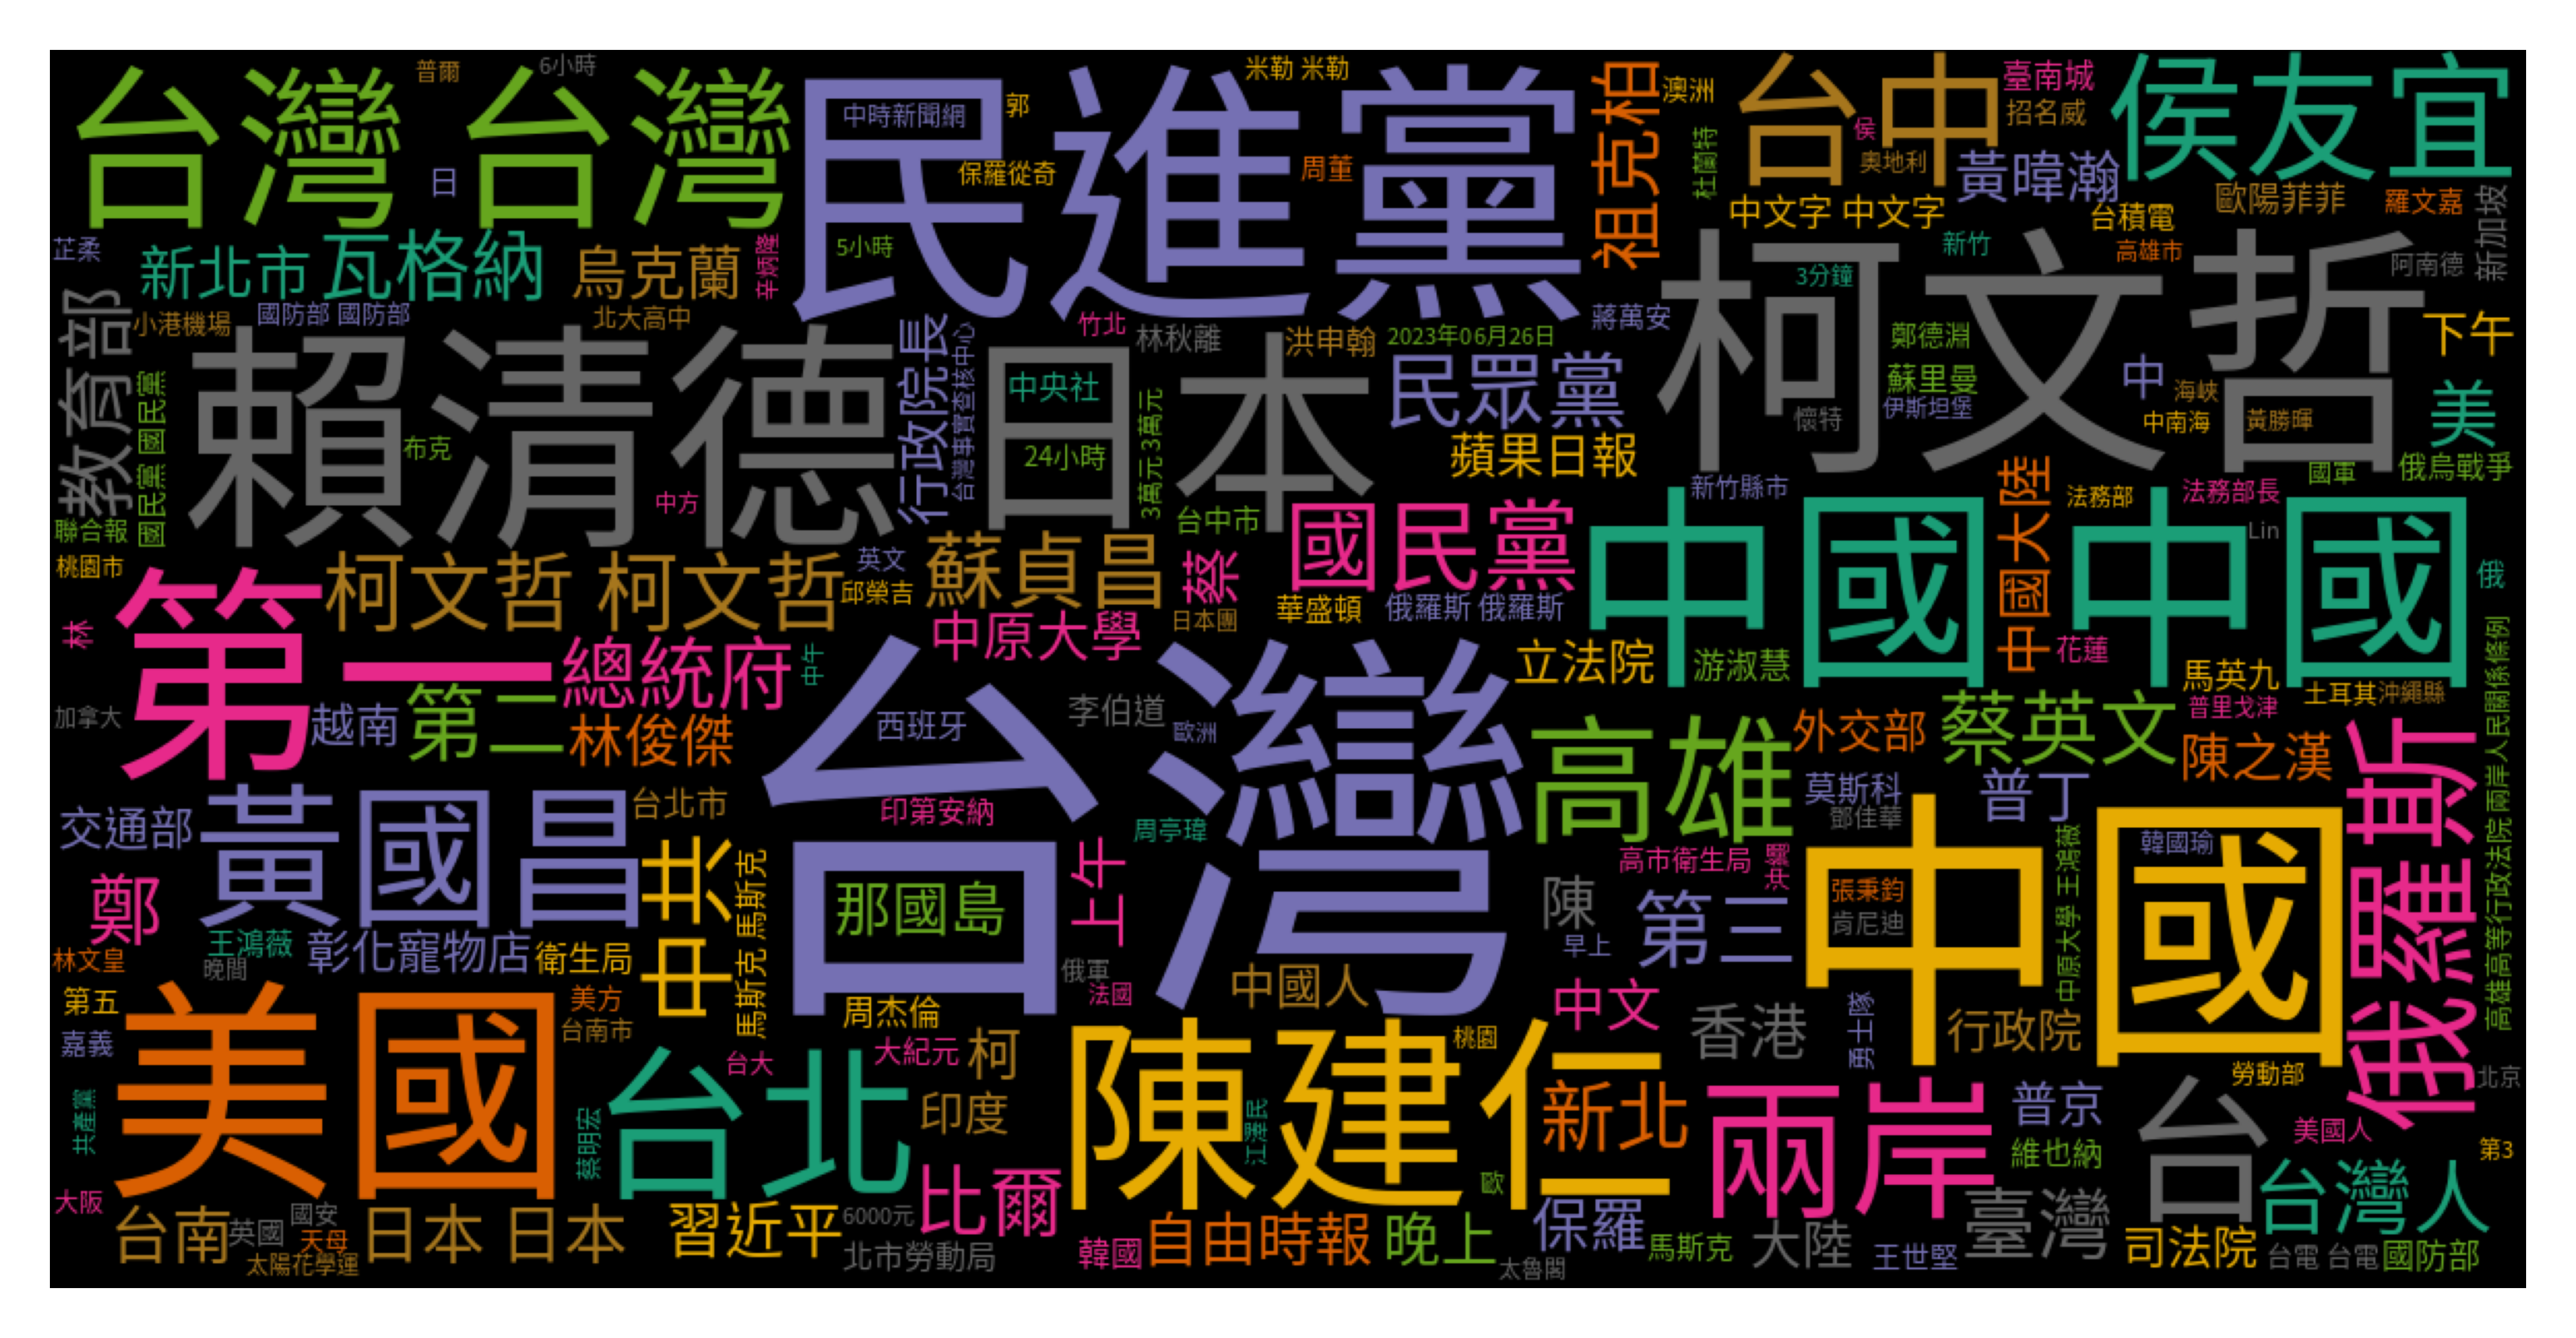

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip"
!unzip "NotoSansCJKtc-hinted.zip"

text = " ".join(review for review in count_list)
# back_color = imageio.imread("./taiwan.png")
wordcloud = WordCloud(width=1200, height=600, max_font_size=200, max_words=200, background_color="black",
                      font_path='NotoSansCJKtc-Regular.otf', colormap="Dark2").generate(text)
plt.figure(dpi=600)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()